<a href="https://colab.research.google.com/github/tllussa/TFM-UOC-MU-DATA-SCIENCE/blob/main/An%C3%A0lisisDadesTFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import plotly.graph_objects as go
import math
from matplotlib.cbook import boxplot_stats

## Càrrega de les dades

In [2]:
# Code to read csv file into Colaboratory:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['dadesTFM.csv']))
# Dataset is now stored in a Pandas Dataframe

df.reset_index(inplace=True)
df['Time'] = pd.to_datetime(df['Time'])
df = df.set_index('Time')

Saving dadesTFM.csv to dadesTFM (1).csv


## Anàlisis estadístic

In [3]:
print("Head")
df.head()

Head


,index,PM 1,PM 2.5,PM 10,PM 1 ATM,PM 2.5 ATM,PM 10 ATM
Time,,,,,,,
2020-11-10 23:12:18.699000+00:00,0,16,23,29,16,23,29
2020-11-10 23:22:18.480000+00:00,1,17,24,30,17,24,30
2020-11-10 23:32:18.549000+00:00,2,17,25,32,17,25,32
2020-11-10 23:42:18.563000+00:00,3,17,25,32,17,25,32
2020-11-10 23:52:18.543000+00:00,4,17,25,32,17,25,32


In [4]:
#Summary statistics
#count: nombre de registres
#mean: valor mitjà
#std: desviació estàndard
#min, max: valor mínim i màxim
#25% , 50% , 75% percentils
print ("Summary statistics:")
df.describe().T

Summary statistics:


,count,mean,std,min,25%,50%,75%,max
index,3897.0,1948.000000,1125.111328,0.0,974.0,1948.0,2922.0,3896.0
PM 1,3897.0,13.705414,13.269070,-126.0,3.0,9.0,19.0,118.0
PM 2.5,3897.0,18.627919,17.588151,-113.0,4.0,13.0,28.0,108.0
PM 10,3897.0,23.342828,19.427695,-125.0,7.0,18.0,35.0,117.0
PM 1 ATM,3897.0,12.047986,10.422024,-127.0,3.0,9.0,19.0,89.0
PM 2.5 ATM,3897.0,17.393893,15.022488,-128.0,4.0,13.0,28.0,117.0
PM 10 ATM,3897.0,22.613036,17.753231,-123.0,7.0,18.0,35.0,121.0


In [5]:
#Info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3897 entries, 2020-11-10 23:12:18.699000+00:00 to 2020-12-13 23:55:36.401000+00:00
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   index       3897 non-null   int64
 1   PM 1        3897 non-null   int64
 2   PM 2.5      3897 non-null   int64
 3   PM 10       3897 non-null   int64
 4   PM 1 ATM    3897 non-null   int64
 5   PM 2.5 ATM  3897 non-null   int64
 6   PM 10 ATM   3897 non-null   int64
dtypes: int64(7)
memory usage: 243.6 KB


## Transformació de dades

In [6]:
columns = ['PM1','PM25','PM10','PM1ATM','PM25ATM','PM10ATM']

df1 = df.copy();

df1 = df1.rename(columns={"PM 1":"PM1","PM 2.5":"PM25","PM 10":"PM10","PM 1 ATM":"PM1ATM","PM 2.5 ATM":"PM25ATM","PM 10 ATM":"PM10ATM"})

df1['PM1'] = df['PM 1'].astype(np.float32)
df1['PM25'] = df['PM 2.5'].astype(np.float32)
df1['PM10'] = df['PM 10'].astype(np.float32)
df1['PM1ATM'] = df['PM 1 ATM'].astype(np.float32)
df1['PM25ATM'] = df['PM 2.5 ATM'].astype(np.float32)
df1['PM10ATM'] = df['PM 10 ATM'].astype(np.float32)

In [7]:
#Info of dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3897 entries, 2020-11-10 23:12:18.699000+00:00 to 2020-12-13 23:55:36.401000+00:00
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    3897 non-null   int64  
 1   PM1      3897 non-null   float32
 2   PM25     3897 non-null   float32
 3   PM10     3897 non-null   float32
 4   PM1ATM   3897 non-null   float32
 5   PM25ATM  3897 non-null   float32
 6   PM10ATM  3897 non-null   float32
dtypes: float32(6), int64(1)
memory usage: 152.2 KB


## Anàlisis exploratori de les dades

In [8]:
for column in columns:
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df1.index, y=df1[column], name=column))
    fig.update_layout(showlegend=True, title='Sensor '+column)
    fig.show()

In [9]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df1.index, y=df1['PM1'], name='PM1'))
fig.add_trace(go.Scatter(x=df1.index, y=df1['PM25'], name='PM25'))
fig.add_trace(go.Scatter(x=df1.index, y=df1['PM10'], name='PM10'))
fig.add_trace(go.Scatter(x=df1.index, y=df1['PM1ATM'], name='PM1ATM'))
fig.add_trace(go.Scatter(x=df1.index, y=df1['PM25ATM'], name='PM25ATM'))
fig.add_trace(go.Scatter(x=df1.index, y=df1['PM10ATM'], name='PM10ATM'))
fig.update_layout(showlegend=True, title='Telemetria dels sensors de particulat',xaxis_title='Data',yaxis_title='µg/m3')
fig.show()

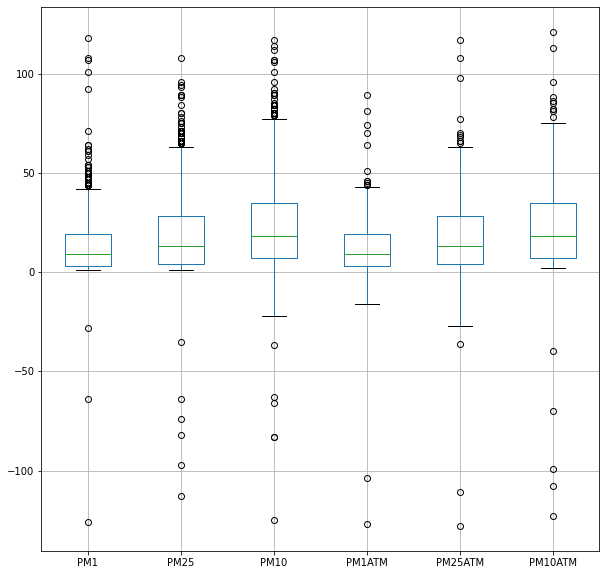

In [10]:
df1.boxplot(column=columns,figsize=(10,10))

In [11]:
df2 = df1.copy()

In [12]:
stats = boxplot_stats(df2.values)

for x in range(1, 7):
  print(columns[x-1])
  print("   Outliers: size: ",stats[x]['fliers'].size,", min: ",stats[x]['fliers'].min(),", max:",stats[x]['fliers'].max())
  print("   iqr:",stats[x]['iqr'])
  print("   mean:",stats[x]['iqr'])
  print("   med:",stats[x]['med'])
  print("   q1:",stats[x]['q1'])
  print("   q3:",stats[x]['q3'])
  print("   whishi:",stats[x]['whishi']) 
  print("   whislo:",stats[x]['whislo'])


PM1
   Outliers: size:  114 , min:  -126.0 , max: 118.0
   iqr: 16.0
   mean: 16.0
   med: 9.0
   q1: 3.0
   q3: 19.0
   whishi: 42.0
   whislo: 1.0
PM25
   Outliers: size:  73 , min:  -113.0 , max: 108.0
   iqr: 24.0
   mean: 24.0
   med: 13.0
   q1: 4.0
   q3: 28.0
   whishi: 63.0
   whislo: 1.0
PM10
   Outliers: size:  52 , min:  -125.0 , max: 117.0
   iqr: 28.0
   mean: 28.0
   med: 18.0
   q1: 7.0
   q3: 35.0
   whishi: 77.0
   whislo: -22.0
PM1ATM
   Outliers: size:  13 , min:  -127.0 , max: 89.0
   iqr: 16.0
   mean: 16.0
   med: 9.0
   q1: 3.0
   q3: 19.0
   whishi: 43.0
   whislo: -16.0
PM25ATM
   Outliers: size:  13 , min:  -128.0 , max: 117.0
   iqr: 24.0
   mean: 24.0
   med: 13.0
   q1: 4.0
   q3: 28.0
   whishi: 63.0
   whislo: -27.0
PM10ATM
   Outliers: size:  15 , min:  -123.0 , max: 121.0
   iqr: 28.0
   mean: 28.0
   med: 18.0
   q1: 7.0
   q3: 35.0
   whishi: 75.0
   whislo: 2.0
